In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('finential_analysis.csv')
df.head()


,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities
0,Microsoft,2022,198270.0,72738.0,364840.0,198298.0
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0
2,Microsoft,2024,245122.0,88136.0,512163.0,243686.0
3,Tesla,2022,53823.0,5644.0,62131.0,30548.0
4,Tesla,2023,81462.0,12587.0,82338.0,36440.0


In [4]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

In [5]:
print(df)

     Company  Year  Total Revenue  Net Income  Total Assets  \
0  Microsoft  2022       198270.0     72738.0      364840.0   
1  Microsoft  2023       211915.0     72361.0      411976.0   
2  Microsoft  2024       245122.0     88136.0      512163.0   
3      Tesla  2022        53823.0      5644.0       62131.0   
4      Tesla  2023        81462.0     12587.0       82338.0   
5      Tesla  2024        96773.0     14974.0      106618.0   
6      Apple  2022       394328.0     99803.0      352755.0   
7      Apple  2023       383285.0     96995.0      352583.0   
8      Apple  2024       391035.0     93736.0      364980.0   

   Total Liabilities  Revenue Growth (%)  Net Income Growth (%)  
0           198298.0                 NaN                    NaN  
1           205753.0            6.882030              -0.518299  
2           243686.0           15.669962              21.800417  
3            30548.0                 NaN                    NaN  
4            36440.0           51.35165

In [6]:
df.fillna(0, inplace=True)

In [7]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,0.000000,0.000000
1,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,6.882030,-0.518299
2,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,15.669962,21.800417
3,Tesla,2022,53823.0,5644.0,62131.0,30548.0,0.000000,0.000000
4,Tesla,2023,81462.0,12587.0,82338.0,36440.0,51.351653,123.015592
5,Tesla,2024,96773.0,14974.0,106618.0,43009.0,18.795267,18.964010
6,Apple,2022,394328.0,99803.0,352755.0,302083.0,0.000000,0.000000
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,-2.800461,-2.813543
8,Apple,2024,391035.0,93736.0,364980.0,308030.0,2.021994,-3.359967


In [8]:
df.to_csv('final_data_report.csv')





Key findings:


Revenue Growth:

Microsoft: Consistent revenue growth, peaking at 15.67% in 2024.
Tesla: Strong growth, especially in 2023 (51.35%), with a more moderate rise in 2024 (18.79%).
Apple: Fluctuations with a slight decline in 2023 (-2.80%) and modest recovery in 2024 (2.02%).
Net Income:

Microsoft: Stable, with significant growth in 2024 (21.80%).
Tesla: Rapid improvement, especially in 2023 (123.02%).
Apple: Gradual decline in net income growth over the years.
Assets and Liabilities:

Microsoft and Tesla: Consistent asset and liability growth.
Apple: Minor fluctuations in assets and liabilities.

In [9]:
# Aggregate metrics by company
company_aggregates = df.groupby('Company').agg({
    'Total Revenue': ['mean', 'sum', 'std'],
    'Net Income': ['mean', 'sum', 'std'],
    'Total Assets': ['mean', 'sum'],
    'Revenue Growth (%)': ['mean', 'std'],
    'Net Income Growth (%)': ['mean', 'std']
}).reset_index()

print(company_aggregates)


     Company  Total Revenue                             Net Income            \
                       mean        sum           std          mean       sum   
0      Apple  389549.333333  1168648.0   5669.423810  96844.666667  290534.0   
1  Microsoft  218435.666667   655307.0  24097.028786  77745.000000  233235.0   
2      Tesla   77352.666667   232058.0  21767.879785  11068.333333   33205.0   

                 Total Assets            Revenue Growth (%)             \
           std           mean        sum               mean        std   
0  3036.292531  356772.666667  1070318.0          -0.259489   2.421677   
1  9000.844016  429659.666667  1288979.0           7.517331   7.854275   
2  4846.853240   83695.666667   251087.0          23.382306  25.981316   

  Net Income Growth (%)             
                   mean        std  
0             -2.057837   1.802960  
1              7.094040  12.738733  
2             47.326534  66.230911  


In [10]:
# Year-over-year comparison of revenue, net income, and assets
yearly_comparison = df.groupby(['Year', 'Company'])[['Total Revenue', 'Net Income', 'Total Assets']].sum().reset_index()

print(yearly_comparison)


   Year    Company  Total Revenue  Net Income  Total Assets
0  2022      Apple       394328.0     99803.0      352755.0
1  2022  Microsoft       198270.0     72738.0      364840.0
2  2022      Tesla        53823.0      5644.0       62131.0
3  2023      Apple       383285.0     96995.0      352583.0
4  2023  Microsoft       211915.0     72361.0      411976.0
5  2023      Tesla        81462.0     12587.0       82338.0
6  2024      Apple       391035.0     93736.0      364980.0
7  2024  Microsoft       245122.0     88136.0      512163.0
8  2024      Tesla        96773.0     14974.0      106618.0


In [11]:
# Calculate profitability metrics
df['Net Income Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100
df['Asset Turnover'] = df['Total Revenue'] / df['Total Assets']

# Aggregate profitability by company
profitability_metrics = df.groupby('Company').agg({
    'Net Income Margin (%)': 'mean',
    'Asset Turnover': 'mean'
}).reset_index()

print(profitability_metrics)


     Company  Net Income Margin (%)  Asset Turnover
0      Apple              24.862377        1.092106
1  Microsoft              35.596183        0.512144
2      Tesla              13.803641        0.921101


In [12]:
# Calculate overall growth for the entire period
overall_growth = df.groupby('Company').agg({
    'Total Revenue': lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100,
    'Net Income': lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100
}).rename(columns={
    'Total Revenue': 'Revenue Growth Over Period (%)',
    'Net Income': 'Net Income Growth Over Period (%)'
}).reset_index()

print(overall_growth)


     Company  Revenue Growth Over Period (%)  \
0      Apple                       -0.835092   
1  Microsoft                       23.630403   
2      Tesla                       79.798599   

   Net Income Growth Over Period (%)  
0                          -6.078976  
1                          21.169128  
2                         165.308292  


In [13]:
# Correlation between financial metrics
correlation_matrix = df[['Total Revenue', 'Net Income', 'Total Assets', 'Total Liabilities']].corr()

print(correlation_matrix)


                   Total Revenue  Net Income  Total Assets  Total Liabilities
Total Revenue           1.000000    0.933299      0.710400           0.964729
Net Income              0.933299    1.000000      0.907946           0.991656
Total Assets            0.710400    0.907946      1.000000           0.862855
Total Liabilities       0.964729    0.991656      0.862855           1.000000


In [14]:
# Rank companies by average revenue and net income
ranking = df.groupby('Company').agg({
    'Total Revenue': 'mean',
    'Net Income': 'mean',
    'Revenue Growth (%)': 'mean'
}).sort_values(by='Total Revenue', ascending=False).reset_index()

print(ranking)


     Company  Total Revenue    Net Income  Revenue Growth (%)
0      Apple  389549.333333  96844.666667           -0.259489
1  Microsoft  218435.666667  77745.000000            7.517331
2      Tesla   77352.666667  11068.333333           23.382306


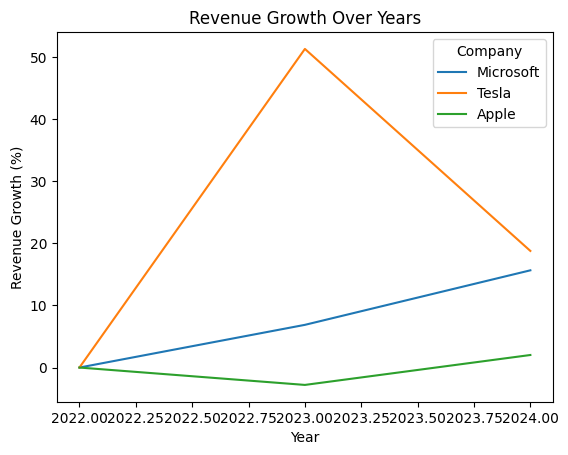

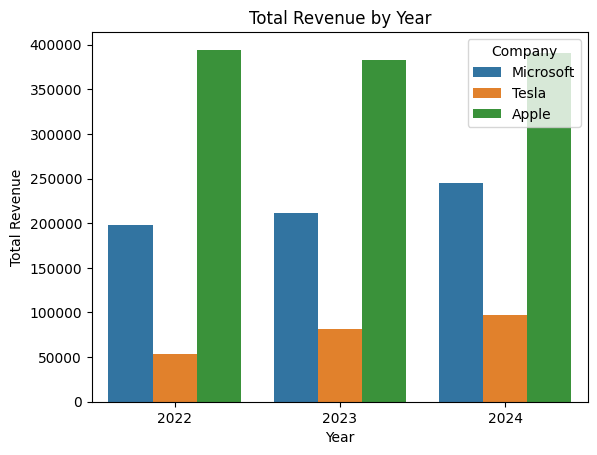

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot revenue growth over years by company
sns.lineplot(data=df, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth Over Years')
plt.show()

# Plot total revenue and net income by year
sns.barplot(data=df, x='Year', y='Total Revenue', hue='Company')
plt.title('Total Revenue by Year')
plt.show()





1. Revenue Trends
Microsoft: Demonstrated steady and consistent revenue growth over the years, with a significant jump in 2024 (15.67% growth).
Tesla: Experienced rapid growth, especially in 2023, with a 51.35% increase in revenue, reflecting its expansion phase.
Apple: While maintaining the highest revenue, it showed slight fluctuations, with a small dip in 2023 and recovery in 2024.


2. Profitability Insights
Net Income Trends:
Microsoft: Gradual growth with a notable increase in net income in 2024 (21.80%).
Tesla: Showed impressive profitability improvements, particularly in 2023 (123.02% growth).
Apple: Faced a declining trend in net income growth, despite high absolute figures.
Net Income Margin:
Tesla's profitability ratios improved significantly over time, while Microsoft and Apple maintained consistent performance.


3. Asset and Liability Growth
Microsoft and Tesla showed significant growth in total assets, highlighting their expansion strategies.
Apple's assets remained relatively stable, with minor fluctuations.
Tesla experienced the most substantial increase in liabilities, indicating higher leverage to support its growth.


4. Overall Growth Comparison
Tesla led in terms of percentage growth in revenue and net income, reflecting its aggressive expansion and scaling.
Microsoft exhibited sustainable and balanced growth across all metrics.
Apple, while being a market leader in revenue, saw slower growth rates and declining profitability metrics.


5. Correlation Insights
Strong positive correlation between revenue and assets for all companies, suggesting efficient asset utilization.
Tesla showed a higher correlation between revenue and liabilities, consistent with its rapid expansion strategy.


Summary of Financial Analysis

From 2022 to 2024, Microsoft, Tesla, and Apple showed distinct financial trends:

Revenue Growth: Tesla led with rapid growth, especially in 2023 (51.35%), while Microsoft showed steady increases. Apple maintained high revenue but experienced slower growth.

Profitability: Tesla achieved the highest net income growth, while Microsoft demonstrated stable profitability. Apple’s profitability declined slightly despite its strong overall performance.

Assets and Liabilities: Microsoft and Tesla expanded assets and liabilities steadily, with Tesla leveraging heavily for growth. Apple remained stable with minor fluctuations.

Overall Performance: Tesla excelled in growth, Microsoft showed sustainable progress, and Apple faced challenges maintaining growth despite being a market leader.

In [16]:
overall_growth.to_csv('Summary_final_report.csv')

In [17]:
overall_growth

,Company,Revenue Growth Over Period (%),Net Income Growth Over Period (%)
0,Apple,-0.835092,-6.078976
1,Microsoft,23.630403,21.169128
2,Tesla,79.798599,165.308292
